In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df1 = pd.read_csv("Data/airline_passengers.csv", index_col="Month", parse_dates=True)
df1.index.freq = 'MS'

In [5]:
df2 = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col="Date", parse_dates=True)
df2.index.freq = 'D'

<AxesSubplot: xlabel='Month'>

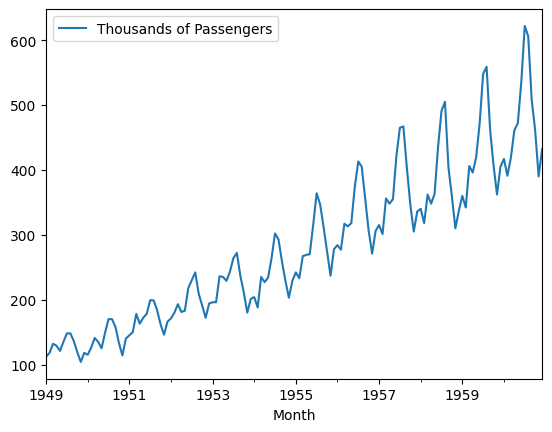

In [6]:
df1.plot()

## 디키 풀러 테스트

In [7]:
from statsmodels.tsa.stattools import adfuller

In [8]:
adfuller(df1['Thousands of Passengers'])

(0.8153688792060447,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [9]:
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag: 'int | None' = None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : {None, int}
        Maximum lag which is included in test, default value of
        12*(nobs/100)^{1/4} is used when ``None``.
    regression : {"c","ct","ctt","n"}
        Constant and trend order to include in regression.
    
        * "c" : constant only (default).
        * "ct" : constant and trend.
        * "ctt" : constant, and linear and quadratic trend.
        * "n" : no constant, no trend.
    
    autolag : {"AIC", "BIC", "t-stat", None}
        Method to use when automatically determining the lag length among the
      

In [14]:
dftest = adfuller(df1['Thousands of Passengers'])
dfout = pd.Series(dftest[0:4], index=['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations'])
dfout

ADF Test Statistic      0.815369
p-value                 0.991880
# Lags Used            13.000000
# Observations        130.000000
dtype: float64

In [15]:
for key, val in dftest[4].items():
    dfout[f'critical value ({key})'] = val

In [16]:
dfout

ADF Test Statistic        0.815369
p-value                   0.991880
# Lags Used              13.000000
# Observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64

In [17]:
# 위 코드 정리된 함수
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [18]:
adf_test(df1['Thousands of Passengers'])

Augmented Dickey-Fuller Test: 
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [19]:
adf_test(df2['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


## 그랜저 인과관계 검증

In [20]:
df3 = pd.read_csv("Data/samples.csv", index_col=0, parse_dates=True)
df3.index.freq = 'MS'

<AxesSubplot: >

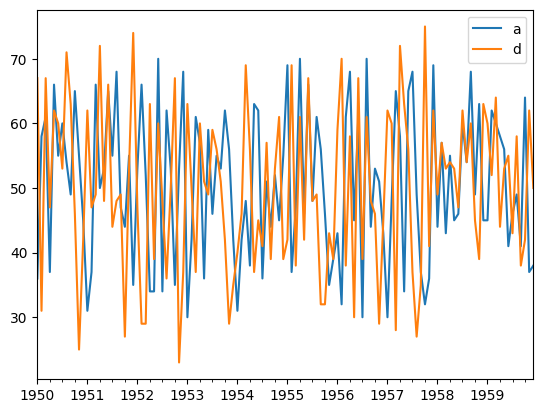

In [21]:
df3[['a', 'd']].plot()

<AxesSubplot: >

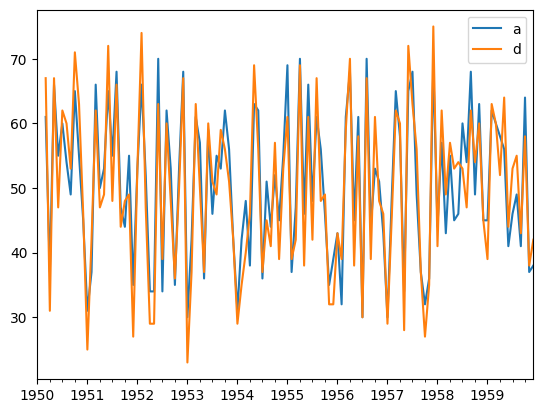

In [22]:
df3['a'].iloc[2:].plot(legend=True)
df3['d'].shift(2).plot(legend=True)

In [23]:
from statsmodels.tsa.stattools import grangercausalitytests

In [24]:
grangercausalitytests(df3[['a', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In [25]:
grangercausalitytests(df3[['b', 'd']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


## 예측 평가

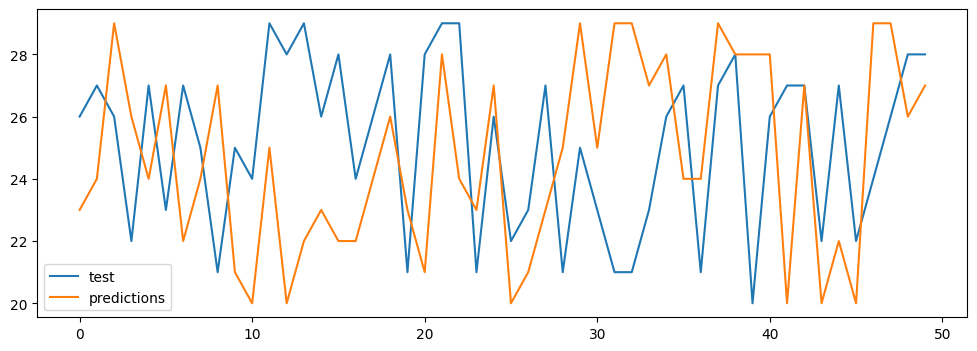

In [27]:
# 가짜 데이터 생서생성
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.plot(figsize=(12,4));

In [31]:
# sklearn 과 동일
from statsmodels.tools.eval_measures import mse, rmse, meanabs

In [28]:
mse(df['test'], df['predictions'])

17.02

In [29]:
rmse(df['test'], df['predictions'])

4.125530268947253

In [30]:
meanabs(df['test'], df['predictions'])

3.54

In [34]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot

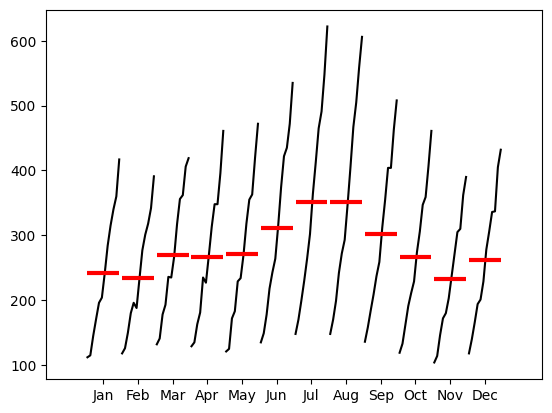

In [35]:
month_plot(df1['Thousands of Passengers']);

In [36]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()

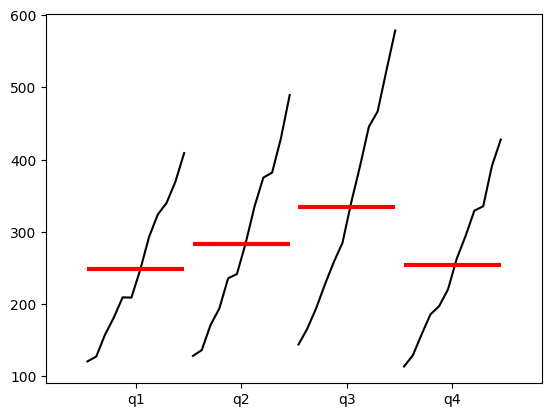

In [38]:
quarter_plot(dfq);